## Libraries

Importing libraries for data imports, EDA, Model building

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importing csv file

In [61]:
df = pd.read_csv('Census Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Number of rows and columns 

In [62]:
print('Number of Rows', df.shape[0])
print('Number of Columns', df.shape[1])

Number of Rows 32560
Number of Columns 15


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


#### Observations:
- The minimum and maximum age of people in the dataset is 17 and 90 years respectively, while the average age is 38.
- The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
- While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
- The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

#### Statistical Analysis

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [65]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [66]:
df.isin(['?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [67]:
df.duplicated().sum()

24

Above code shows there are 24 duplicates present in the whole dataset. 
Printing just all the duplicates

In [68]:
duplicated_rows = df.duplicated()

print((df[duplicated_rows]))

       Age          Workclass  Fnlwgt      Education  Education_num  \
4880    25            Private  308144      Bachelors             13   
5103    90            Private   52386   Some-college             10   
9170    21            Private  250051   Some-college             10   
11630   20            Private  107658   Some-college             10   
13083   25            Private  195994        1st-4th              2   
15058   21            Private  243368      Preschool              1   
17039   46            Private  173243        HS-grad              9   
18554   30            Private  144593        HS-grad              9   
18697   19            Private   97261        HS-grad              9   
21317   19            Private  138153   Some-college             10   
21489   19            Private  146679   Some-college             10   
21874   49            Private   31267        7th-8th              4   
22299   25            Private  195994        1st-4th              2   
22366 

In [69]:
df.drop_duplicates(inplace=True)

In [70]:
df.duplicated().sum()

0

Final shape of the dataframe after treating duplicate and null values

In [73]:
df.shape

(32536, 15)

In [71]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

The Most columns names are self-explanatory remaining are explain below :</b>
- Fnlwgt: sampling weight
- Education_num: number of years of education in total
- Capital_gain/Capital_loss: income from investment sources other than salary/wages

## Analysing all the columns one by one

#### 1. Age 

In [11]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

<AxesSubplot:>

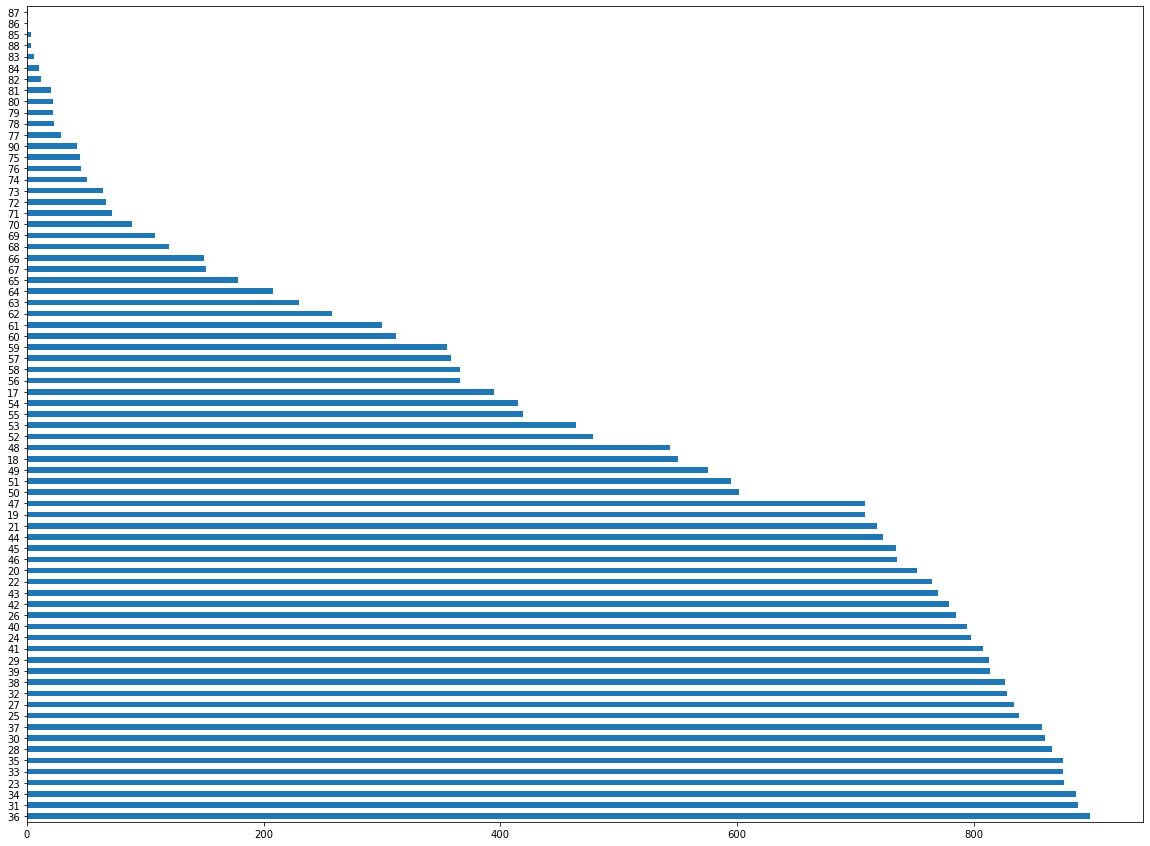

In [12]:
ages = df['Age'].value_counts()
ages.plot(kind='barh',figsize=(20,15))

* Majority of the people are between the age range of 36 to 47

#### 2. Workclass

<AxesSubplot:>

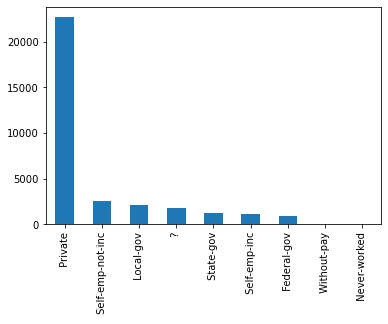

In [13]:
wrkcls = df['Workclass'].value_counts()
wrkcls.plot(kind='bar')

<AxesSubplot:xlabel='Workclass', ylabel='count'>

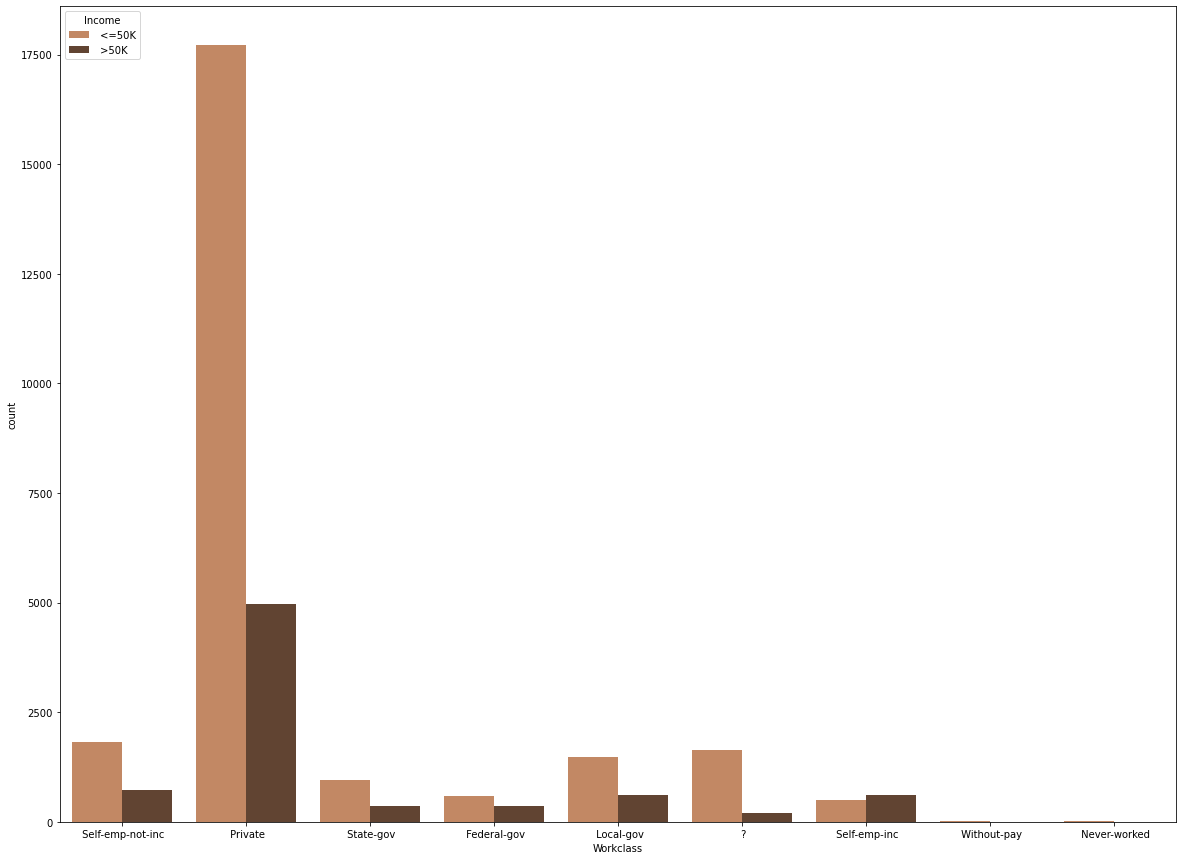

In [14]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['Workclass'],hue=df['Income'],palette='copper_r')

#### 3. Education

<AxesSubplot:>

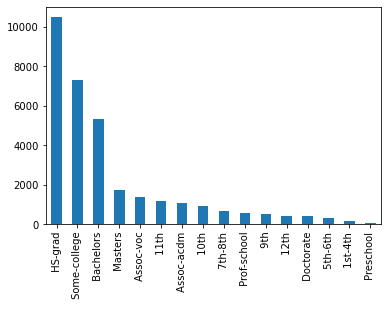

In [15]:
edu = df['Education'].value_counts()
edu.plot(kind='bar')

<AxesSubplot:xlabel='Education', ylabel='count'>

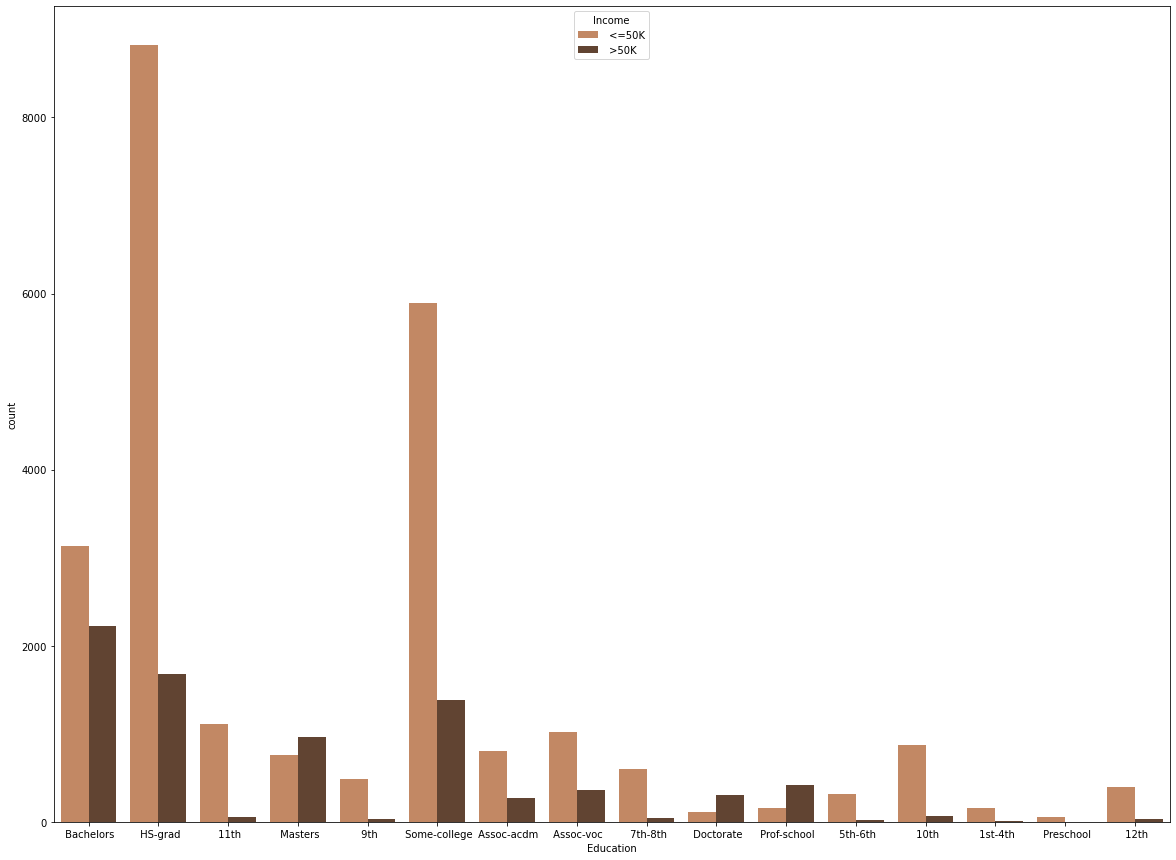

In [16]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['Education'],hue=df['Income'],palette='copper_r')

#### 4. final weights

In [17]:
fnlwts = df['Fnlwgt'].value_counts()
fnlwts

123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

#### 5. Education Number

In [18]:
df['Education_num']

0        13
1         9
2         7
3        13
4        14
         ..
32555    12
32556     9
32557     9
32558     9
32559     9
Name: Education_num, Length: 32536, dtype: int64

#### 6. Marital Status

In [19]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

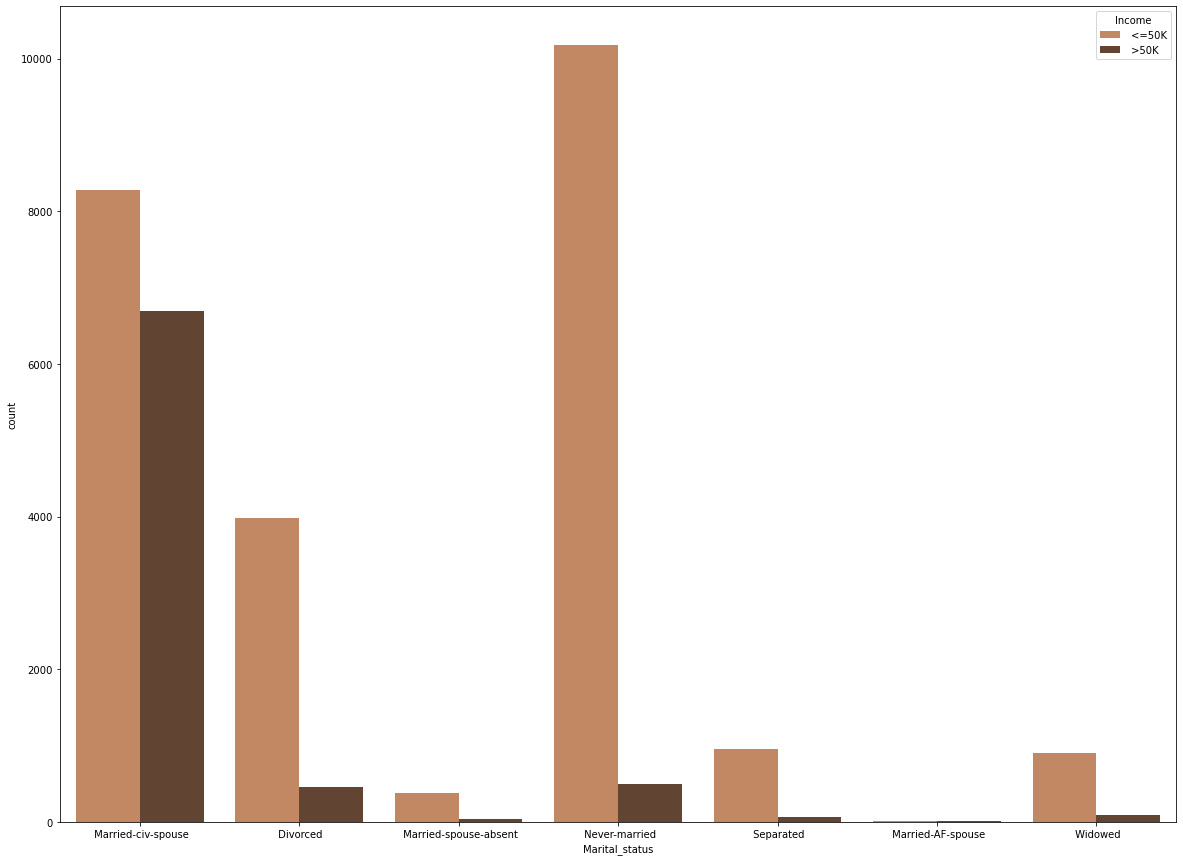

In [20]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['Marital_status'],hue=df['Income'],palette='copper_r')

#### 7. Occupation

<AxesSubplot:>

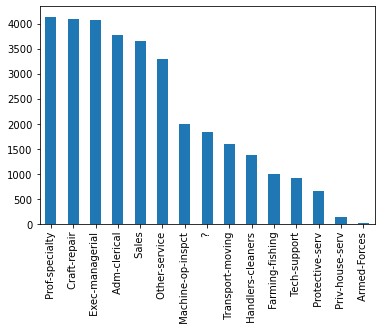

In [21]:
occ = df['Occupation'].value_counts()
occ.plot(kind='bar')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

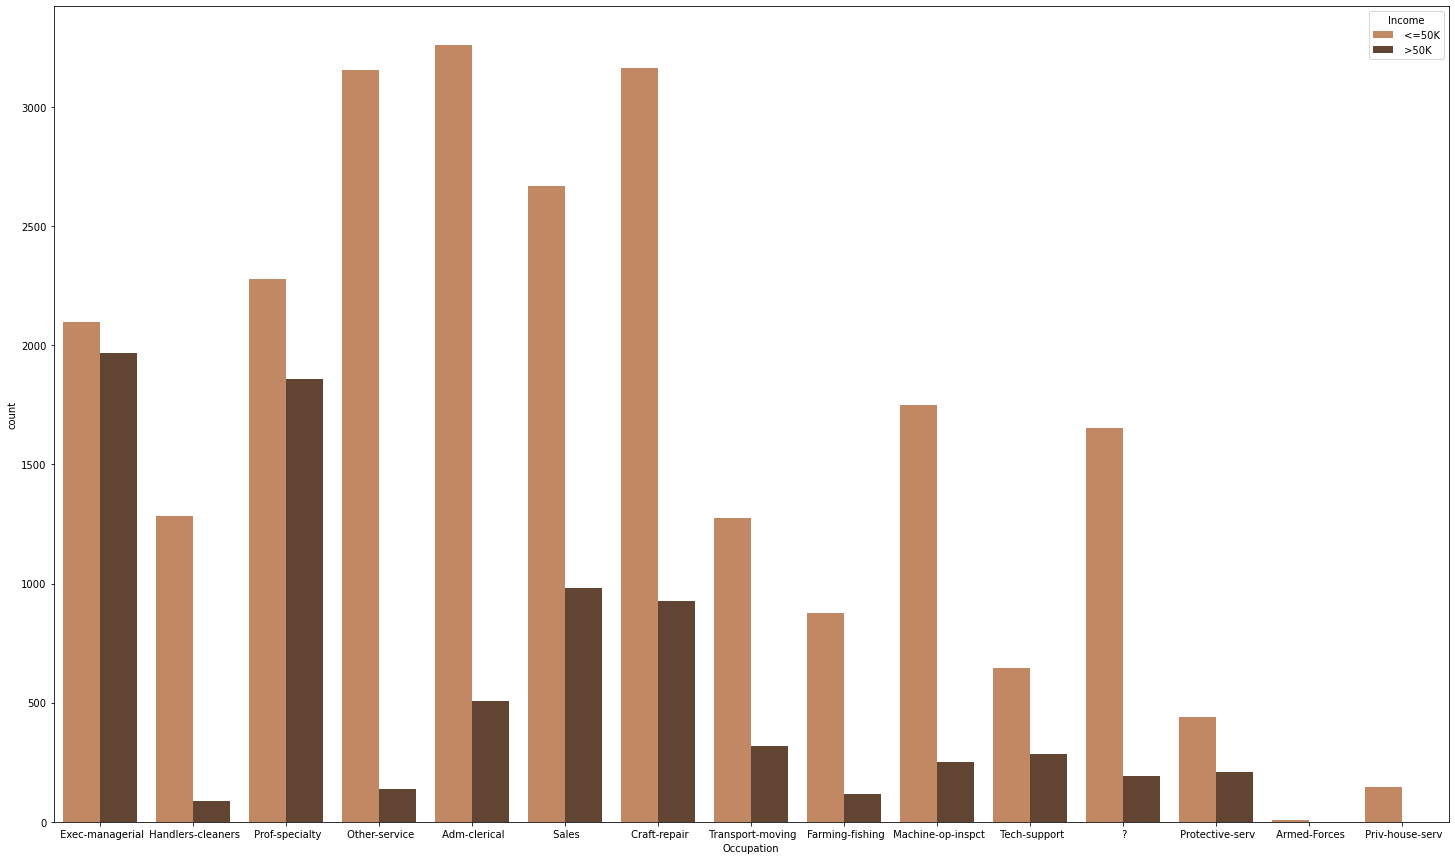

In [22]:
plt.figure(figsize=(25,15))
sns.countplot(x=df['Occupation'],hue=df['Income'],palette='copper_r')

* Exec-managerial & Prof-speciality have more number of earners who earn >= 50K 
* Those who work at armed earn the lowest among all the professions
* Clerical positions have the highest number of earners (<50K)

#### 8. Relationship

In [23]:
df['Relationship'].value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

<AxesSubplot:xlabel='Relationship', ylabel='count'>

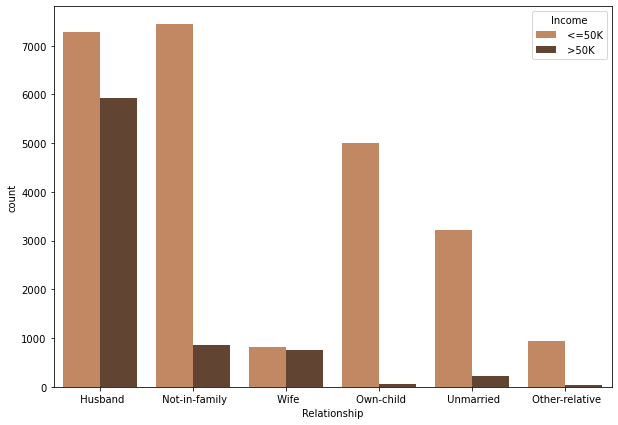

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Relationship'],hue=df['Income'],palette='copper_r')

#### 9. Race

In [25]:
df['Race'].value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

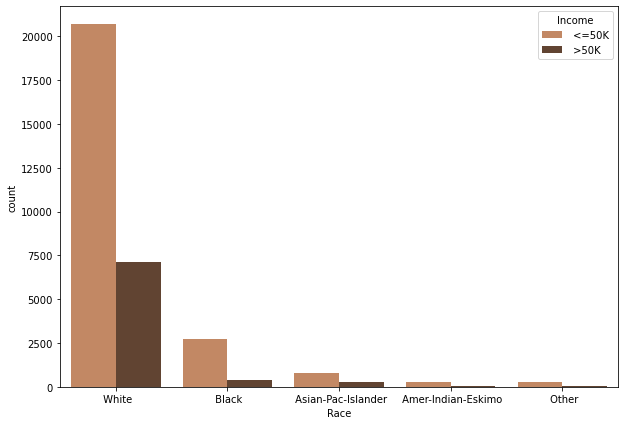

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(df['Race'],hue=df['Income'],palette='copper_r')

#### 10. Sex

In [27]:
df['Sex'].value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Count'>

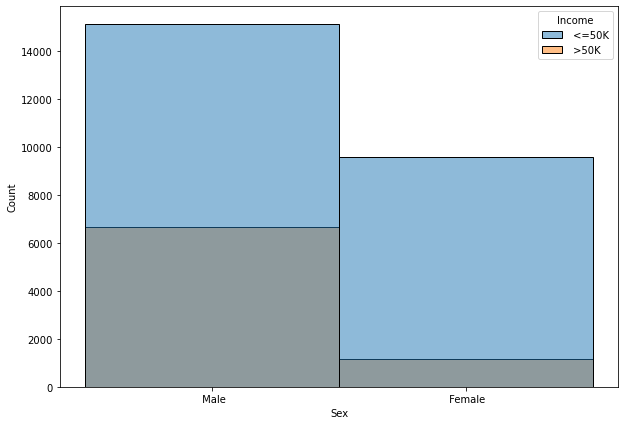

In [28]:
plt.figure(figsize=(10,7))
# sns.countplot(df['Sex'],hue=df['Income'],palette='copper_r')
sns.histplot(df, x='Sex', hue='Income')

#### 11. Capital Gain

In [29]:
df['Capital_gain'].value_counts()

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

#### 12. Capital Loss

In [30]:
df['Capital_loss'].value_counts()

0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

#### 13. Hours Per week

In [31]:
df['Hours_per_week'].value_counts()

40    15203
50     2817
45     1823
60     1475
35     1296
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

#### 14. Native Country

In [32]:
df['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

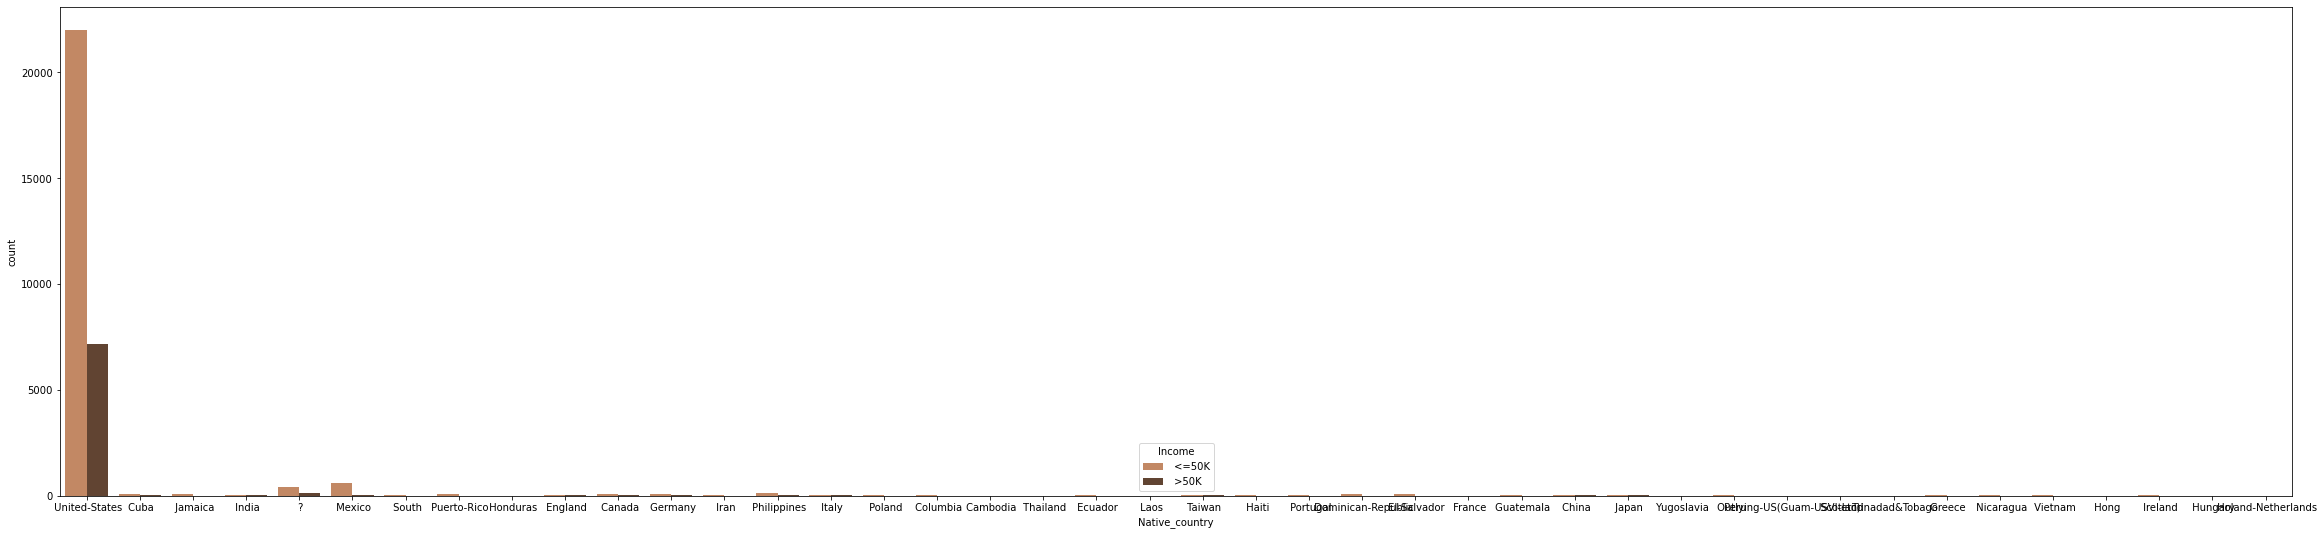

In [33]:
plt.figure(figsize=(40,9))
sns.countplot(df['Native_country'],hue=df['Income'],palette='copper_r')

* Highest number of earners are from United States

#### Label Encoding to the income column

In [34]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [36]:
column =df.columns
column

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in column:
    if df[col].dtype=='O':
        df[col]=le.fit_transform(df[col])

df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Workclass       32536 non-null  int32
 2   Fnlwgt          32536 non-null  int64
 3   Education       32536 non-null  int32
 4   Education_num   32536 non-null  int64
 5   Marital_status  32536 non-null  int32
 6   Occupation      32536 non-null  int32
 7   Relationship    32536 non-null  int32
 8   Race            32536 non-null  int32
 9   Sex             32536 non-null  int32
 10  Capital_gain    32536 non-null  int64
 11  Capital_loss    32536 non-null  int64
 12  Hours_per_week  32536 non-null  int64
 13  Native_country  32536 non-null  int32
 14  Income          32536 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.9 MB


#### Scaling the columns

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


std = StandardScaler()
mms = MinMaxScaler()
columns_to_scaler = ['Capital_gain', 'Capital_loss', 'Hours_per_week']
df[columns_to_scaler] = std.fit_transform(df[columns_to_scaler]) 

#### Model Building

In [40]:
X = df.iloc[:,:-1]
y = df['Income']

In [41]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,-0.145969,-0.216747,-2.222450,39
1,38,4,215646,11,9,0,6,1,4,1,-0.145969,-0.216747,-0.035664,39
2,53,4,234721,1,7,2,6,0,2,1,-0.145969,-0.216747,-0.035664,39
3,28,4,338409,9,13,2,10,5,2,0,-0.145969,-0.216747,-0.035664,5
4,37,4,284582,12,14,2,4,5,4,0,-0.145969,-0.216747,-0.035664,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,-0.145969,-0.216747,-0.197648,39
32556,40,4,154374,11,9,2,7,0,4,1,-0.145969,-0.216747,-0.035664,39
32557,58,4,151910,11,9,6,1,4,4,0,-0.145969,-0.216747,-0.035664,39
32558,22,4,201490,11,9,4,1,3,4,1,-0.145969,-0.216747,-1.655506,39


In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22775, 14)
(9761, 14)
(22775,)
(9761,)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score

In [49]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=500)),
    ('Support Vector Machine', SVC()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier())
]


results = []
names = []

for name,model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv = 5)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean Accuracy: {np.mean(cv_results):.3f}")
    


Logistic Regression: Mean Accuracy: 0.759
Support Vector Machine: Mean Accuracy: 0.759
Gradient Boosting Classifier: Mean Accuracy: 0.863
Decision Tree Classifier: Mean Accuracy: 0.809
